In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
# Charger les données des fichiers CSV
data_btc = pd.read_csv('D:/Analyse-comparative-des-actifs-financiers/bitcoin_historical_data_cleaned.csv')
data_sp500 = pd.read_csv('D:/Analyse-comparative-des-actifs-financiers/sp500_historical_data_cleaned.csv')
data_gold = pd.read_csv('D:/Analyse-comparative-des-actifs-financiers/gold_historical_data_cleaned.csv')



In [31]:
import pandas as pd
import numpy as np
 
# Charger les données des fichiers CSV
data_btc = pd.read_csv('D:/Analyse-comparative-des-actifs-financiers/bitcoin_historical_data_cleaned.csv')
data_sp500 = pd.read_csv('D:/Analyse-comparative-des-actifs-financiers/sp500_historical_data_cleaned.csv')
data_gold = pd.read_csv('D:/Analyse-comparative-des-actifs-financiers/gold_historical_data_cleaned.csv')

#Convertir en format numerique 
data_btc['Close'] = pd.to_numeric(data_btc['Close'], errors='coerce')
data_sp500['Close'] = pd.to_numeric(data_sp500['Close'], errors='coerce')
data_gold['Close'] = pd.to_numeric(data_gold['Close'], errors='coerce')

#Calcul des rendements quotidiens 
data_btc['Return'] = data_btc['Close'].pct_change().round(3)
data_sp500['Return'] = data_sp500['Close'].pct_change().round(3)
data_gold['Return'] = data_gold['Close'].pct_change().round(3)

## Calcul des rendements annuels
annual_return_btc = round(data_btc['Return'].mean() * 252,3)
annual_return_sp500 = round(data_sp500['Return'].mean() * 252,3)
annual_return_gold = round(data_gold['Return'].mean() * 252,3)

# Calcul de la volatilité
volatility_btc = round(data_btc['Return'].std() * (252**0.5),3)
volatility_sp500 = round(data_sp500['Return'].std() * (252**0.5),3)
volatility_gold = round(data_gold['Return'].std() * (252**0.5),3)

# Calcul de la volatilité quotidienne
volatility_daily_btc = round(data_btc['Return'].std(),3)
volatility_daily_sp500 = round(data_sp500['Return'].std(),3)
volatility_daily_gold = round(data_gold['Return'].std(),3)

# Calcul de la volatilité annuelle
volatility_annual_btc = round(volatility_daily_btc * np.sqrt(252),3)
volatility_annual_sp500 = round(volatility_daily_sp500 * np.sqrt(252),3)
volatility_annual_gold = round(volatility_daily_gold * np.sqrt(252),3)

# Calcul du Sharpe Ratio
risk_free_rate = 0.01
sharpe_ratio_btc = round((annual_return_btc - risk_free_rate) / volatility_annual_btc,3)
sharpe_ratio_sp500 =round( (annual_return_sp500 - risk_free_rate) / volatility_annual_sp500,3)
sharpe_ratio_gold = round((annual_return_gold - risk_free_rate) / volatility_annual_gold,3)


# Function to calculate drawdown percentage
def calculate_drawdown_pct(data):
    """Calculates the drawdown percentage for a given DataFrame."""
    peak = data['Close'].cummax()
    drawdown = (data['Close'] - peak) / peak
    return (drawdown * 100).round(3) # Convert to percentage


# Calculate and add 'drawdown_pct' column to each DataFrame
data_btc['drawdown_pct'] = calculate_drawdown_pct(data_btc)
data_sp500['drawdown_pct'] = calculate_drawdown_pct(data_sp500)
data_gold['drawdown_pct'] = calculate_drawdown_pct(data_gold)

# Calcul du Sortino Ratio (en supposant un taux sans risque de 0.01)
risk_free_rate = 0.01
downside_risk_btc = round(np.std(data_btc['Return'][data_btc['Return'] < 0]),3)
downside_risk_sp500 =round( np.std(data_sp500['Return'][data_sp500['Return'] < 0]) ,3)
downside_risk_gold = round(np.std(data_gold['Return'][data_gold['Return'] < 0]),3)

sortino_ratio_btc = round((annual_return_btc - risk_free_rate) / (downside_risk_btc * np.sqrt(252)),3)
sortino_ratio_sp500 = round((annual_return_sp500 - risk_free_rate) / (downside_risk_sp500 * np.sqrt(252)),3)
sortino_ratio_gold = round((annual_return_gold - risk_free_rate) / (downside_risk_gold * np.sqrt(252)),3)

# Calcul de l'Ulcer Index
ulcer_index_btc = round(np.sqrt(np.mean(data_btc['drawdown_pct'] ** 2)),3)
ulcer_index_sp500 = round(np.sqrt(np.mean(data_sp500['drawdown_pct'] ** 2)),3)
ulcer_index_gold = round(np.sqrt(np.mean(data_gold['drawdown_pct'] ** 2)),3)

# Créer des DataFrames pour enregistrer les résultats
results_btc = pd.DataFrame({
    'Rendement Quotidien': data_btc['Return'],
    'Volatilité Quotidienne': volatility_daily_btc,
    'Volatilité Annuelle': volatility_annual_btc,
    'Sharpe Ratio': sharpe_ratio_btc,
    'Sortino Ratio': sortino_ratio_btc,
    'Ulcer Index': ulcer_index_btc
})

results_sp500 = pd.DataFrame({
    'Rendement Quotidien': data_sp500['Return'],
    'Volatilité Quotidienne': volatility_daily_sp500,
    'Volatilité Annuelle': volatility_annual_sp500,
    'Sharpe Ratio': sharpe_ratio_sp500,
    'Sortino Ratio': sortino_ratio_sp500,
    'Ulcer Index': ulcer_index_sp500
})


results_gold = pd.DataFrame({
    'Rendement Quotidien': data_gold['Return'],
    'Volatilité Quotidienne': volatility_daily_gold,
    'Volatilité Annuelle': volatility_annual_gold,
    'Sharpe Ratio': sharpe_ratio_gold,
    'Sortino Ratio': sortino_ratio_gold,
    'Ulcer Index': ulcer_index_gold
})




# Enregistrer les résultats en CSV
results_btc.to_csv('D:/Analyse-comparative-des-actifs-financiers/results_btc.csv', index=False)
results_sp500.to_csv('D:/Analyse-comparative-des-actifs-financiers/results_sp500.csv', index=False)
results_gold.to_csv('D:/Analyse-comparative-des-actifs-financiers/results_gold.csv', index=False)

<Figure size 1200x600 with 0 Axes>

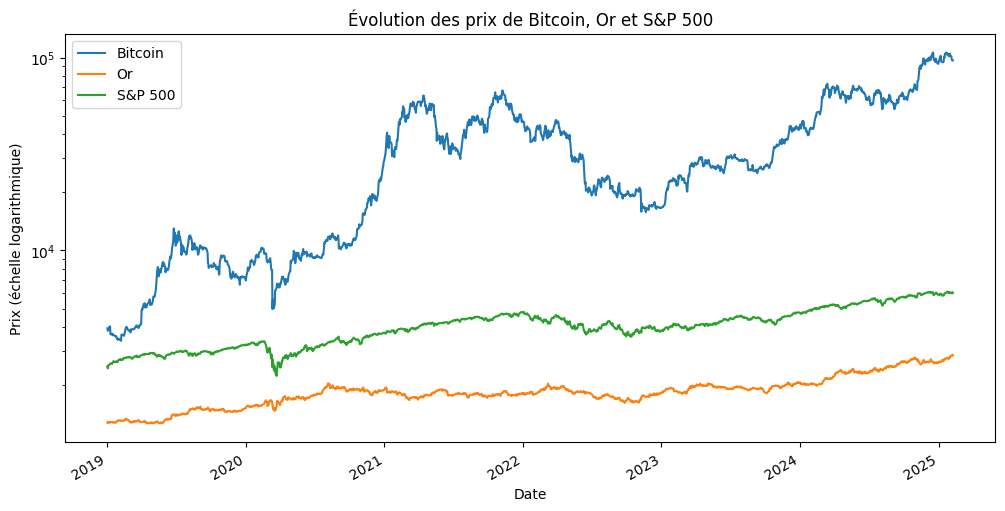

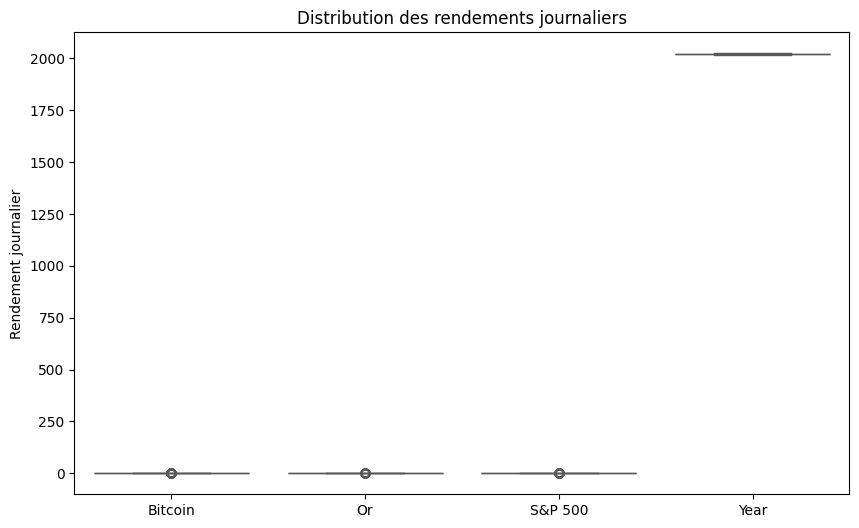

<Figure size 1200x600 with 0 Axes>

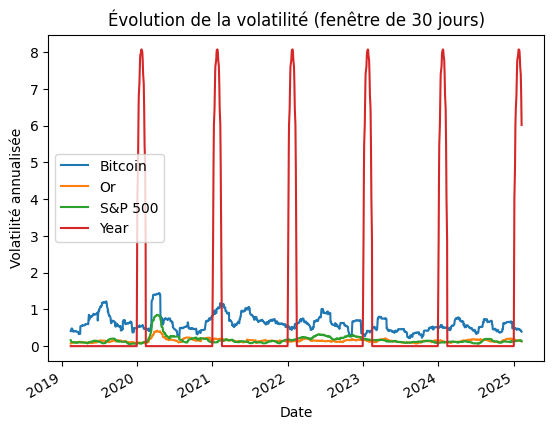

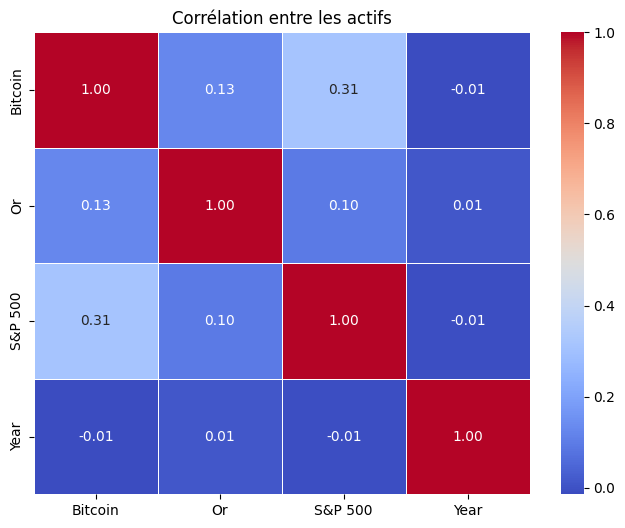

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données des fichiers CSV
data_btc = pd.read_csv('D:/Analyse-comparative-des-actifs-financiers/bitcoin_historical_data_cleaned.csv')
data_sp500 = pd.read_csv('D:/Analyse-comparative-des-actifs-financiers/sp500_historical_data_cleaned.csv')
data_gold = pd.read_csv('D:/Analyse-comparative-des-actifs-financiers/gold_historical_data_cleaned.csv')


# Renommer la colonne des prix de clôture
data_btc.rename(columns={'Close': 'Bitcoin'}, inplace=True)
data_gold.rename(columns={'Close': 'Or'}, inplace=True)
data_sp500.rename(columns={'Close': 'S&P 500'}, inplace=True)

# Convertir la colonne 'Date' en format datetime
data_btc['Date'] = pd.to_datetime(data_btc['Date'])
data_gold['Date'] = pd.to_datetime(data_gold['Date'])
data_sp500['Date'] = pd.to_datetime(data_sp500['Date'])

# Fusionner les données sur la colonne "Date"
df = data_btc[['Date', 'Bitcoin']].merge(data_gold[['Date', 'Or']], on='Date', how='inner')
df = df.merge(data_sp500[['Date', 'S&P 500']], on='Date', how='inner')

# Mettre la date en index
df.set_index('Date', inplace=True)

# 1️⃣ **Évolution des prix des actifs (Tendances historiques)**
plt.figure(figsize=(12, 6))
df.plot(logy=True, figsize=(12, 6))
plt.title("Évolution des prix de Bitcoin, Or et S&P 500")
plt.ylabel("Prix (échelle logarithmique)")
plt.xlabel("Date")
plt.legend()
plt.show()

# Calculer les rendements journaliers
returns = df.pct_change().dropna()

 #**Calcul et affichage des rendements annuels**
returns['Year'] = returns.index.year
annual_returns = returns.groupby('Year').mean() * 252  # Annualisation des rendements


# 2️⃣ **Boîtes à moustaches des rendements**
plt.figure(figsize=(10, 6))
sns.boxplot(data=returns, palette="Set2")
plt.title("Distribution des rendements journaliers")
plt.ylabel("Rendement journalier")
plt.show()

# 3️⃣ **Volatilité des actifs sur une fenêtre mobile de 30 jours**
rolling_volatility = returns.rolling(window=30).std() * np.sqrt(252)

plt.figure(figsize=(12, 6))
rolling_volatility.plot()
plt.title("Évolution de la volatilité (fenêtre de 30 jours)")
plt.ylabel("Volatilité annualisée")
plt.xlabel("Date")
plt.legend()
plt.show()

# 4️⃣ **Heatmap des corrélations**
plt.figure(figsize=(8, 6))
sns.heatmap(returns.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Corrélation entre les actifs")
plt.show()


In [5]:
# Convertir la colonne Date en format datetime
data_gold['Date'] = pd.to_datetime(data_gold['Date'])
data_btc['Date'] = pd.to_datetime(data_btc['Date'])
data_sp500['Date'] = pd.to_datetime(data_sp500['Date'])

# Trier les données par date
data_gold.sort_values('Date', inplace=True)
data_btc.sort_values('Date', inplace=True)
data_sp500.sort_values('Date', inplace=True)

# Renommer la colonne des prix de clôture
data_gold.rename(columns={'Close': 'Gold'}, inplace=True)
data_btc.rename(columns={'Close': 'Bitcoin'}, inplace=True)
data_sp500.rename(columns={'Close': 'S&P 500'}, inplace=True)


# Fusionner les datasets sur la date
df = pd.merge(data_gold[['Date', 'Gold']], data_btc[['Date', 'Bitcoin']], on='Date', how='inner')
df = pd.merge(df, data_sp500[['Date', 'S&P 500']], on='Date', how='inner')

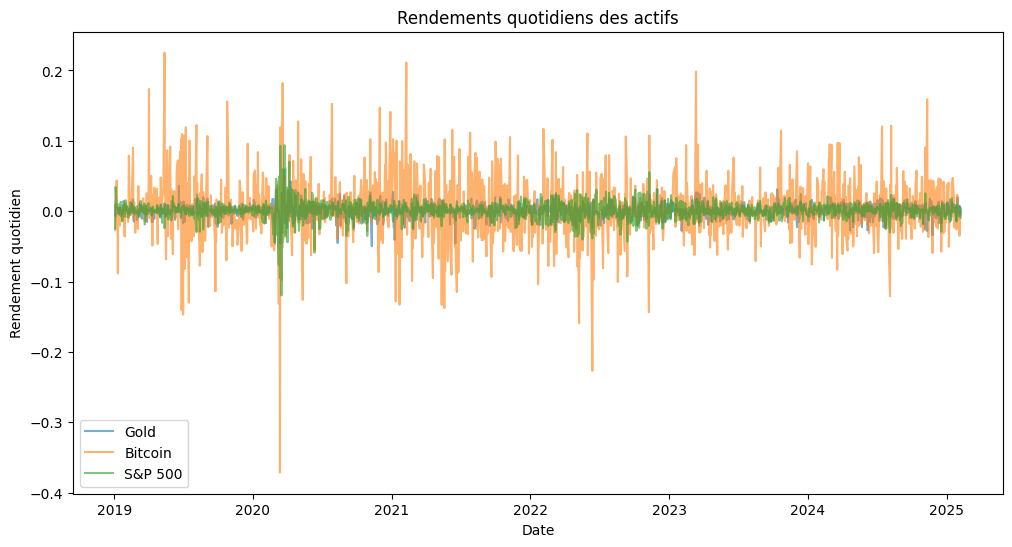

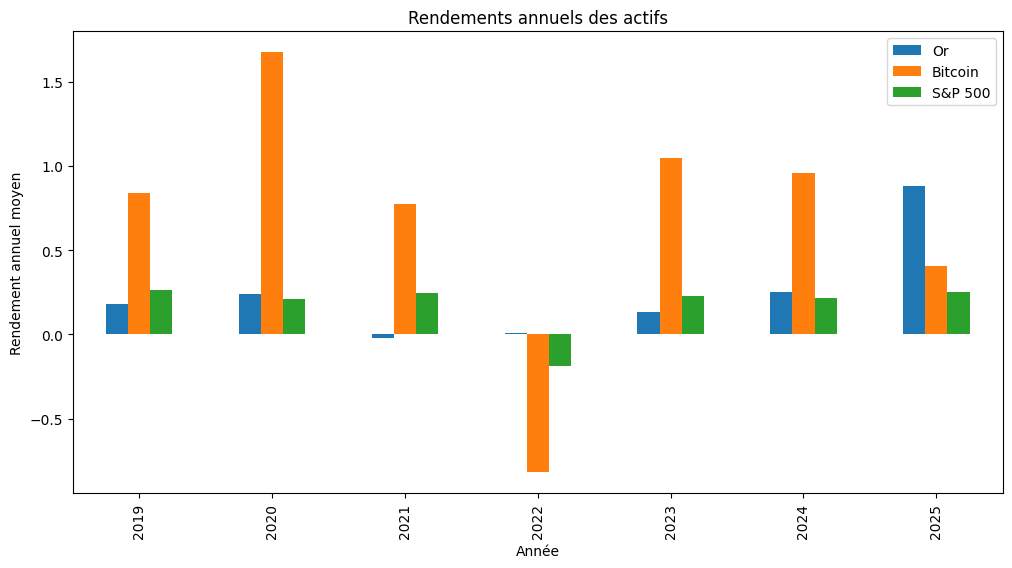

In [6]:
#Rendements quotidiens et annuels 


# Calcul des rendements quotidiens
df[['Gold_Daily_Return', 'Bitcoin_Daily_Return', 'SP500_Daily_Return']] = df[['Gold', 'Bitcoin', 'S&P 500']].pct_change()

# Calcul des rendements annuels
df['Year'] = df['Date'].dt.year
annual_returns = df.groupby('Year')[['Gold_Daily_Return', 'Bitcoin_Daily_Return', 'SP500_Daily_Return']].mean() * 252

# Graphique des rendements quotidiens
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Gold_Daily_Return'], label='Gold', alpha=0.6)
plt.plot(df['Date'], df['Bitcoin_Daily_Return'], label='Bitcoin', alpha=0.6)
plt.plot(df['Date'], df['SP500_Daily_Return'], label='S&P 500', alpha=0.6)
plt.legend()
plt.title("Rendements quotidiens des actifs")
plt.xlabel("Date")
plt.ylabel("Rendement quotidien")
plt.show()

# Graphique des rendements annuels
annual_returns.plot(kind='bar', figsize=(12,6))
plt.title("Rendements annuels des actifs")
plt.ylabel("Rendement annuel moyen")
plt.xlabel("Année")
plt.legend(["Or", "Bitcoin", "S&P 500"])
plt.show()










In [9]:
# Recalcul des rendements quotidiens pour chaque actif
data_btc['Return'] = data_btc['Close'].pct_change()
data_gold['Return'] = data_gold['Close'].pct_change()
data_sp500['Return'] = data_sp500['Close'].pct_change()

# Vérification que la colonne a bien été créée
print(data_btc[['Date', 'Close', 'Return']].head())
print(data_gold[['Date', 'Close', 'Return']].head())
print(data_sp500[['Date', 'Close', 'Return']].head())



# Regroupement des rendements des trois actifs
returns_df = pd.DataFrame({
    'Bitcoin': data_btc['Return'],
    'Or': data_gold['Return'],
    'S&P 500': data_sp500['Return']
})

# Calcul de la matrice de corrélation
correlation_matrix = returns_df.corr()

# 📊 Affichage de la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de Corrélation des Rendements")
plt.show()

KeyError: 'Close'